# ENCUESTA NACIONAL DE EMPLEO - ENE
## Analisis trimestral  - 2018 - 03 


### DataSet
http://www.ine.cl/estadisticas/laborales/ene/base-de-datos
- Original data on SPSS (.SAV) format converted to .CSV using "R"

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!ls *.csv

ENE_2018_01_DEF.csv ENE_2018_02_EFM.csv ENE_2018_03_FMA.csv ENE_2018_04_MAM.csv


In [4]:
# Load dataset
df = pd.read_csv('ENE_2018_03_FMA.csv', error_bad_lines=False, warn_bad_lines=False)
df.shape # (75416, 137)

(75416, 137)

In [5]:
df.head()

,id_directorio,id_identificacion,region,r_p_c,ano_trimestre,mes_central,ano_encuesta,mes_encuesta,estrato,tipo,...,cae_general,cae_especifico,categoria_ocupacion,habituales,efectivas,cine,fact,r_p_rev4cl_caenes,sector,ocup_form
1,24483,242270,Metropolitana,Cerro Navia,2018,Febrero-Abril,2018,Abril,13111,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de estudio (Habitual),No corresponde,NaN,NaN,Educación secundaria,346.059,NaN,0,0
2,19221,236272,Biobío,Los Alamos,2018,Febrero-Abril,2018,Abril,8112,RAU,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de jubilación (Habitual),No corresponde,NaN,NaN,Educación secundaria,120.083,NaN,0,0
4,23954,258792,Tarapacá,Iquique,2018,Febrero-Abril,2018,Abril,1021,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de pensión o montepiado (Habitual),No corresponde,NaN,NaN,Educación Técnica (Educación Superior no unive...,33.1838,NaN,0,0
8,16178,231448,Los Ríos,Lanco,2018,Febrero-Abril,2018,Abril,14039,Rural,...,Inactivos que no buscaron trabajo ni estuviero...,Sin deseo de trabajar,No corresponde,NaN,NaN,Educación primaria (nivel 1),120.027,NaN,0,0
11,22804,232993,Maule,Curicó,2018,Febrero-Abril,2018,Febrero,7011,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones familiares permanentes (Habitual),No corresponde,NaN,NaN,Educación primaria (nivel 1),160.693,NaN,0,0


### Viewing dataset

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75416 entries, 1 to 102456
Data columns (total 137 columns):
id_directorio          int64
id_identificacion      int64
region                 object
r_p_c                  object
ano_trimestre          int64
mes_central            object
ano_encuesta           int64
mes_encuesta           object
estrato                int64
tipo                   object
hogar                  int64
nro_linea              int64
edad                   int64
parentesco             object
sexo                   object
curso                  object
nivel                  object
termino_nivel          object
est_conyugal           object
proveedor              object
nacionalidad           object
a1                     object
a2                     object
a3                     object
a4                     object
a5                     object
a6                     object
a6_otro                object
a7                     object
a8                     obje

In [7]:
for col in df:
    print ('\n', col)
    print (df[col].unique())


 id_directorio
[24483 19221 23954 ... 19413 23415 17041]

 id_identificacion
[242270 236272 258792 ... 258700 244049 251998]

 region
['Metropolitana' 'Biobío' 'Tarapacá' 'Los Ríos' 'Maule'
 'Arica y Parinacota' 'La Araucanía' 'Valparaíso' 'O´Higgins' 'Coquimbo'
 'Atacama' 'Los Lagos' 'Antofagasta' 'Magallanes' 'Aysén']

 r_p_c
['Cerro Navia' 'Los Alamos' 'Iquique' 'Lanco' 'Curicó' 'Arica'
 'Padre Las Casas' 'San José de Maipo' 'San Bernardo' 'San Javier'
 'San Antonio' 'Pozo Almonte' 'Rengo' 'Lebu' 'Valparaíso' 'La Florida'
 'Llaillay' 'Paine' 'La Serena' 'San Esteban' 'Pirque' 'El Bosque' 'Lota'
 'Nancagua' 'Pudahuel' 'Calle Larga' 'Florida' 'Concepción' 'Panguipulli'
 'Copiapó' 'Melipilla' 'Cañete' 'Rancagua' 'Maipú' 'La Unión' 'Pichidegua'
 'San Fernando' 'Placilla' 'Huasco' 'Los Andes' 'Teno' 'Salamanca'
 'Quinta Normal' 'Osorno' 'Viña del Mar' 'Antofagasta' 'Cabrero' 'Temuco'
 'Nacimiento' 'San Carlos' 'Curanilahue' 'Victoria' 'Purranque'
 'San Felipe' 'Taltal' 'Alto Hospicio' '


 b18_region
[nan 'San Bernardo' 'Los Ángeles' 'Santiago' 'Valdivia' 'Puerto Octay'
 'Iquique' 'Quilicura' 'Valparaíso' 'San Antonio' 'Melipilla' 'Pichilemu'
 'Maipú' 'Arica' 'Los Andes' 'Puerto Montt' 'Puente Alto' 'Chillán'
 'Vallenar' 'Peñalolén' 'Castro' 'Punta Arenas' 'El Bosque' 'Las Condes'
 'Ovalle' 'Panguipulli' 'Mejillones' 'Talcahuano' 'Colina' 'Curacautín'
 'Alto del Carmen' 'Alto Hospicio' 'La Serena' 'Providencia' 'El Monte'
 'Villa Alemana' 'San Miguel' 'Calama' 'Temuco' 'La Calera'
 'Padre Hurtado' 'Aysén' 'San Felipe' 'La Florida' 'San Pedro de la Paz'
 'Concepción' 'Quinta de Tilcoco' 'Rengo' 'Antofagasta' 'Parral' 'Angol'
 'Quinta Normal' 'Copiapó' 'Linares' 'Coronel' 'Lota' 'Coquimbo'
 'Cerro Navia' 'Quilpué' 'Rancagua' 'Tomé' 'Vitacura' 'Litueche'
 'Diego de Almagro' 'San Fernando' 'Osorno' 'Conchalí' 'Pemuco' 'Pudahuel'
 'Renca' 'La Ligua' 'Paredones' 'Tierra Amarilla' 'Pica' 'Catemu' 'Ñuñoa'
 'Limache_duplicated_5802' 'Llaillay' 'Arauco' 'San Ramón' 'Quellón'
 'R

[346.05891033 120.08326678 33.18382331 ... '179.90791547' '171.73690376'
 '20.91730672']

 r_p_rev4cl_caenes
[nan 24.00447834 100.84472051 ... '481.01837652' '24.09112495'
 '90.39087467']

 sector
[0 nan '0' ... '254.84607346' '61.80943908' '25.44287575']

 ocup_form
[0 '0' 'Sector informal' ... '37.47508326' '211.78789203' '276.5686478']


### DataSet general overview:
- Columns up to "nacionalidad" are social-economic data regarding samples
- Columns from 'a_n' to 'e_n' are data collect from questionary's answers
- Column "cae_general" seems to be the "conclusion" regarding why a person is not ocupied

In [8]:
df.cae_general.value_counts()

Inactivos que no buscaron trabajo ni estuvieron disponibles para trabajar                                                                                                                                                                                          21055
Menor de quince años                                                                                                                                                                                                                                               19584
                                                                                                                                                                                                                                                                    4750
Inactivos que estuvieron disponibles para trabajar                                                                                                                                                           

In [9]:
df.region.value_counts()
# 15 regions

Metropolitana         18410
Biobío                10446
Valparaíso            10293
Maule                  4551
Los Lagos              4497
Coquimbo               4452
O´Higgins              4270
La Araucanía           3990
Arica y Parinacota     2639
Tarapacá               2588
Antofagasta            2531
Atacama                2253
Los Ríos               2048
Aysén                  1519
Magallanes              929
Name: region, dtype: int64

In [10]:
df.r_p_c.value_counts().head()
# 276 cities

Arica           2630
San Bernardo    1595
Concepción      1522
Iquique         1445
Puente Alto     1442
Name: r_p_c, dtype: int64

In [11]:
df.mes_encuesta.value_counts()

Abril      25455
Febrero    25019
Marzo      24942
Name: mes_encuesta, dtype: int64

### Numerical Analysis

In [12]:
POP = len(df.edad)
print ("Total Population:", POP, '\n')

Total Population: 75416 



In [13]:
df.edad.describe()

count    75416.000000
mean        35.730800
std         24.570221
min          0.000000
25%         14.000000
50%         32.000000
75%         56.000000
max        107.000000
Name: edad, dtype: float64

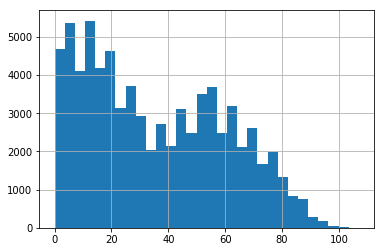

In [14]:
df.edad.hist(bins=30)

In [15]:
df_15 = df[df.edad >=15]
PET = len(df_15)
print ("Total Chilean Population over 15 years (PET):", PET, '\n')

Total Chilean Population over 15 years (PET): 55832 



In [16]:
print ("Pop potential over total: {}% \n".format(round(PET/POP, 2)*100))

Pop potential over total: 74.0% 



### Working with Questionary

<img src="Sit_Lab.png">

Main Questions:
- Question A1:  Did you work at least 1 hour last week?
- Question A2:  Did you make any deal that resulted as work?
- Question A3:  Will you make money with this work?
- Question A5:  Even if not worked, did yoy have any other paid activity?
- Question E1:  Did you try to get a work on the last 12 months?
- Question E2:  Did you try to get a work on the last 4 weeks?

In [17]:
df_ocupados = df_15[df_15.a1 == 'Sí']
df_ocupados.shape

(19472, 137)

In [18]:
df_ocupados = df_ocupados[df_ocupados.a3 == 'Sí']
df_ocupados.shape

(19246, 137)

In [19]:
df_not_ocup = df_15[df_15.a1 == 'No']
df_not_ocup.shape

(33887, 137)

In [20]:
df_not_ocup = df_not_ocup[df_not_ocup.a2 == 'No']
df_not_ocup.shape

(33343, 137)

In [21]:
df_ocup_aus = df_not_ocup[df_not_ocup.a5 == 'Sí']
df_ocup_aus.shape

(2087, 137)

In [22]:
r = 'Inactivos que no buscaron trabajo ni estuvieron disponibles para trabajar'
df_inativos = df_15[df_15.cae_general == r]
df_inativos.shape

(21055, 137)

In [23]:
r = 'Inactivos que estuvieron disponibles para trabajar'
df_desocupados = df_15[df_15.cae_general == r]
df_desocupados.shape

(2406, 137)

In [24]:
r = 'Cesante'
df_cesantes = df_15[df_15.cae_general == r]
df_cesantes.shape

(928, 137)

In [25]:
POP_OCUP = len(df_ocupados) + len(df_ocup_aus)
print ("Total Chilean Population over 15 years working:", POP_OCUP)

Total Chilean Population over 15 years working: 21333


In [26]:
POP_INAT = len(df_inativos) +len(df_cesantes)
print ("Total Chilean Population over 15 years Inactive :", POP_INAT)

Total Chilean Population over 15 years Inactive : 21983


In [27]:
PEA = PET - POP_INAT
print ("Total Chilean Population Economic active:", PEA)

Total Chilean Population Economic active: 33849


In [28]:
POP_DESOCUP = len(df_desocupados)
print ("Total Chilean Population over 15 years w/o job:", POP_DESOCUP)

Total Chilean Population over 15 years w/o job: 2406


In [29]:
TD = POP_DESOCUP/POP_OCUP
print ("Tasa de Desempleo: {}% \n".format(round(TD, 3)*100))

Tasa de Desempleo: 11.3% 



### Regional Analysis

In [30]:
df.region.value_counts()
# 15 regions

Metropolitana         18410
Biobío                10446
Valparaíso            10293
Maule                  4551
Los Lagos              4497
Coquimbo               4452
O´Higgins              4270
La Araucanía           3990
Arica y Parinacota     2639
Tarapacá               2588
Antofagasta            2531
Atacama                2253
Los Ríos               2048
Aysén                  1519
Magallanes              929
Name: region, dtype: int64

In [31]:
REGION = 'Metropolitana'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Metropolitana

Regional Population over 15 years working: 5702
Regional Population over 15 years w/o job:  648
Tasa de Desempleo Regional:                11.4%


In [32]:
REGION = 'Atacama'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Atacama

Regional Population over 15 years working: 629
Regional Population over 15 years w/o job:  87
Tasa de Desempleo Regional:                13.8%


In [33]:
REGION = 'Los Lagos'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Los Lagos

Regional Population over 15 years working: 1295
Regional Population over 15 years w/o job:  80
Tasa de Desempleo Regional:                6.2%
